Main file for the code used in the Machine Learning course project.

In [122]:
#Importing all the necessary libraries that are used in the program
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE

In [4]:
def boolToNum(boolArr):
    for i in range(len(boolArr)):
        if boolArr[i]:
            boolArr[i] = int(1) 
        else:
            boolArr[i] = int(0)
        
    return boolArr

First, the data is imported from the data file 'notebooks/ML_project_code/nearest-earth-objects(1910-2024).csv'.
The data is then separated into single feature and label arrays.

In [77]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

#cleaning up the data
data = df.drop(['neo_id', 'name','orbiting_body'], axis = 1)
data = data.dropna()

#shuffling the data to get randomized training, testing and validation sets 
np_data = data.to_numpy()
np.random.shuffle(np_data)

len(df['absolute_magnitude'])
length = 0.6*len(df['absolute_magnitude'])


#training set 60% of the data, validation set 20% of the data, testing set 20% of data
full_set_size = len(np_data)
training_set_size = int(len(df['absolute_magnitude'])//(100/60))
valid_set_size = int((full_set_size-training_set_size)/2)

X_train = np_data[0:training_set_size,0:5]
X_valid = np_data[training_set_size+1:training_set_size+valid_set_size, 0:5]
X_test = np_data[training_set_size+valid_set_size+1:full_set_size, 0:5]

y_train = np_data[0:training_set_size,5]
y_valid = np_data[training_set_size+1:training_set_size+valid_set_size, 5]
y_test = np_data[training_set_size+valid_set_size+1:full_set_size, 5]


y_train = boolToNum(y_train).astype('int')
y_valid = boolToNum(y_valid).astype('int')
y_test = boolToNum(y_test).astype('int')

#All five features
fe_absolute_magnitude = df['absolute_magnitude'].values
fe_estimated_diameter_min = df['estimated_diameter_min'].values
fe_estimated_diameter_max = df['estimated_diameter_max'].values
fe_relative_velocity = df['relative_velocity'].values
fe_miss_distance = df['miss_distance'].values

#The boolean label
la_is_hazardous_ = df['is_hazardous'].values

Plotting the features:

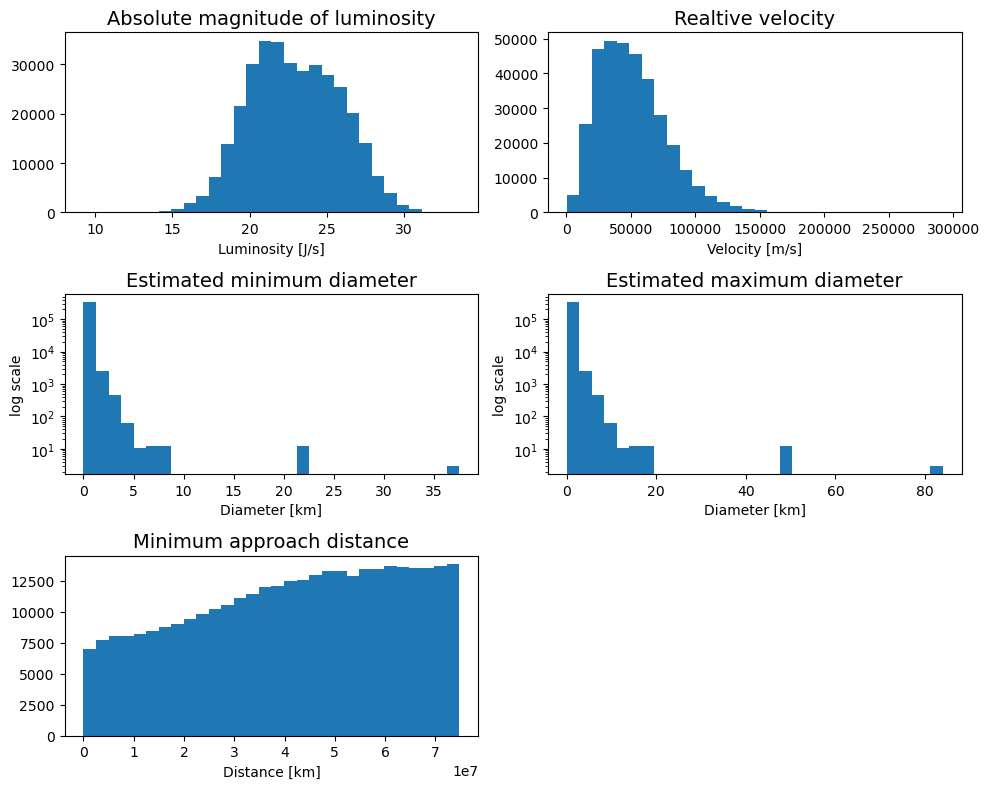

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, tight_layout=False, figsize=(10,8))

ax[0][0].hist(fe_absolute_magnitude,bins=30);
ax[0][0].set_title('Absolute magnitude of luminosity', fontsize=14)
ax[0][0].set_xlabel('Luminosity [J/s]', fontsize=10)

ax[0][1].hist(fe_relative_velocity,bins=30);
ax[0][1].set_title('Realtive velocity', fontsize=14)
ax[0][1].set_xlabel('Velocity [m/s]', fontsize=10)


ax[1][0].hist(fe_estimated_diameter_min,bins=30,log=True);
ax[1][0].set_title('Estimated minimum diameter', fontsize=14)
ax[1][0].set_xlabel('Diameter [km]', fontsize=10)
ax[1][0].set_ylabel('log scale', fontsize=10)

ax[1][1].hist(fe_estimated_diameter_max,bins=30,log=True);
ax[1][1].set_title('Estimated maximum diameter', fontsize=14)
ax[1][1].set_xlabel('Diameter [km]', fontsize=10)
ax[1][1].set_ylabel('log scale', fontsize=10)

ax[2][0].hist(fe_miss_distance,bins=30);
ax[2][0].set_title('Minimum approach distance', fontsize=14)
ax[2][0].set_xlabel('Distance [km]', fontsize=10)

fig.delaxes(ax[2][1])


Plotting the label:

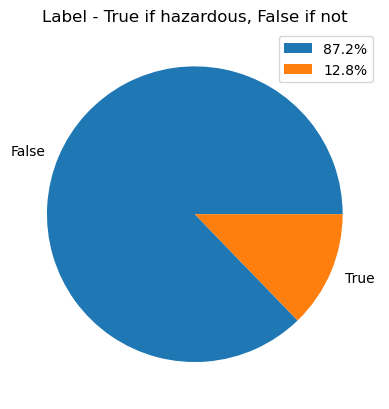

In [7]:
#Number of hazardouns (True) and nonhazardous (False) labels
nr_true = len(la_is_hazardous_[la_is_hazardous_ == True]);
nr_false = len(la_is_hazardous_[la_is_hazardous_ == False]);

#Percents of True and False labels
percent_true = np.round(nr_true/len(la_is_hazardous_)*100,1)
percent_false = np.round(nr_false/len(la_is_hazardous_)*100,1)

#Pie plot of the labels
plt.pie([nr_false, nr_true], labels=['False', 'True']);
plt.title('Label - True if hazardous, False if not');
plt.legend([str(percent_false)+'%', str(percent_true)+'%']);

In [123]:
#balancing the data
resample1 = SMOTEENN()
resample2 = SMOTETomek()
resample3 = SMOTE()
A, B = resample1.fit_resample(X_train, y_train)
C, D = resample2.fit_resample(X_train, y_train)
E, F = resample3.fit_resample(X_train, y_train)

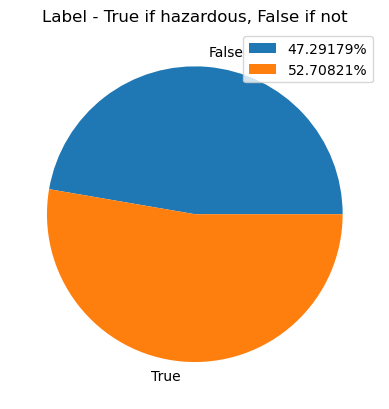

In [80]:
#Number of hazardouns (True) and nonhazardous (False) labels
y_ = B

nr_true = len(y_[y_ == 1]);
nr_false = len(y_[y_ == 0]);

#Percents of True and False labels
percent_true = np.round(nr_true/len(y_)*100,5)
percent_false = np.round(nr_false/len(y_)*100,5)

#Pie plot of the labels
plt.pie([nr_false, nr_true], labels=['False', 'True']);
plt.title('Label - True if hazardous, False if not');
plt.legend([str(percent_false)+'%', str(percent_true)+'%']);

Multi-layer percepton

In [9]:
def train_model(hidden_layer_shape=(16,8), max_iter=100,  random_state=35):
    # Create an MLPClassifier model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_shape, max_iter=max_iter, random_state=random_state)
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_ = scaler.fit_transform(X_train)
    X_valid_ = scaler.transform(X_valid)
    
    y_train_ = y_train
    y_valid_ = y_valid

    # Train the model on the training data
    # print(len(X_train_))
    mlp.fit(X_train_, y_train_)

    # Make predictions on the test data
    y_pred = mlp.predict(X_valid_)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_valid_, y_pred)
    
    return y_pred, accuracy, mlp



In [12]:
hidden_layers = [(4,2), (8,4), (16,8), (32,16), (64,32), (8,8,8), (16,8,8), (16,16,8), (16,32,16), (16,32,32,16), (32,16,16,8)]
hidden_layers = [(16,8), (32,16), (64,32), (16,8,8), (16,16,8), (16,32,16), (16,32,32,16)]
l = len(hidden_layers)
y_pred_arr = np.zeros((l, valid_set_size-1))
accuracy_arr = np.zeros(l)
mlp_arr = []

for i in range(len(hidden_layers)):
    y_pred_, accuracy_, mlp_ = train_model(hidden_layers[i], 200, 35)
    #print(y_pred_)
    y_pred_arr[i,:] = y_pred_
    accuracy_arr[i] = accuracy_
    mlp_arr.append(mlp_)



In [13]:
con_mat = confusion_matrix(y_valid, y_pred_arr[6])
print(con_mat)

[[58121   862]
 [ 6854  1788]]


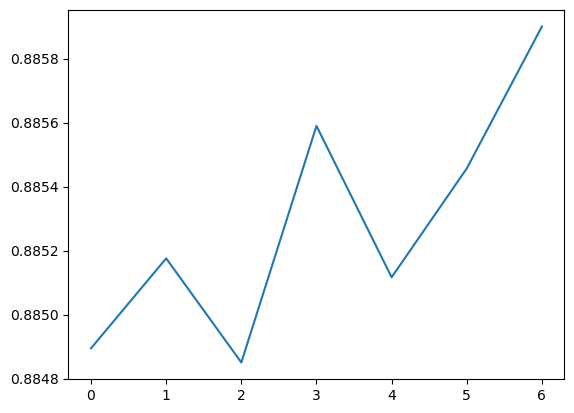

In [14]:
plt.plot(accuracy_arr)

Logistic Regression:

In [157]:
#training error without balanced data
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_LogRegr = clf.predict(X_train)
accuracy_LogRegr = accuracy_score(y_train, y_pred_LogRegr)

loss = log_loss(y_train, y_pred_LogRegr)
print('Logistis loss:',loss)
    
print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Training error:', 1.0-accuracy_LogRegr)
conf_mat = confusion_matrix(y_train, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistis loss: 4.59393653429564
Accuracy of LogRegr: 0.8725452027656355
Training error: 0.12745479723436448
Confusion matrix:
 [[177056      0]
 [ 25863      0]]


In [158]:
#training error with balanced out data
clf = LogisticRegression()
clf.fit(A, B)
y_pred_LogRegr = clf.predict(A)
accuracy_LogRegr = accuracy_score(B, y_pred_LogRegr)

loss = log_loss(B, y_pred_LogRegr)
print('Logistis loss:',loss)

print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Training error:', 1.0-accuracy_LogRegr)
conf_mat = confusion_matrix(B, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistis loss: 12.155388461839934
Accuracy of LogRegr: 0.6627592566543192
Training error: 0.33724074334568077
Confusion matrix:
 [[46894 43821]
 [20910 80318]]


In [159]:
#validation error without balanced data
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_LogRegr = clf.predict(X_valid)
accuracy_LogRegr = accuracy_score(y_valid, y_pred_LogRegr)

loss = log_loss(y_valid, y_pred_LogRegr)
print('Logistic loss:', loss)

print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Validation error:', 1.0-accuracy_LogRegr)
conf_mat = confusion_matrix(y_valid, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistic loss: 4.656760068920023
Accuracy of LogRegr: 0.8708022181146026
Validation error: 0.12919778188539743
Confusion matrix:
 [[58888     0]
 [ 8737     0]]


In [160]:
#validation error with balanced out data
clf = LogisticRegression()
clf.fit(A, B)
y_pred_LogRegr = clf.predict(X_valid)
accuracy_LogRegr = accuracy_score(y_valid, y_pred_LogRegr)

loss = log_loss(y_valid, y_pred_LogRegr)
print('Logistis loss:',loss)
    
print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Validation error:', 1.0-accuracy_LogRegr)
conf_mat = confusion_matrix(y_valid, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistis loss: 18.93351126567998
Accuracy of LogRegr: 0.4747060998151571
Validation error: 0.5252939001848429
Confusion matrix:
 [[25650 33238]
 [ 2285  6452]]


In [165]:
#test error without balanced data
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_LogRegr = clf.predict(X_test)
accuracy_LogRegr = accuracy_score(y_test, y_pred_LogRegr)

loss = log_loss(y_test, y_pred_LogRegr)
print('Logistis loss:',loss)
    
print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Test error:', 1-accuracy_LogRegr)
conf_mat = confusion_matrix(y_test, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistis loss: 4.562420303302665
Accuracy of LogRegr: 0.8734195933456562
Test error: 0.12658040665434378
Confusion matrix:
 [[59065     0]
 [ 8560     0]]


In [166]:
#test error with balanced data
clf = LogisticRegression()
clf.fit(A, B)
y_pred_LogRegr = clf.predict(X_test)
accuracy_LogRegr = accuracy_score(y_test, y_pred_LogRegr)

loss = log_loss(y_test, y_pred_LogRegr)
print('Logistis loss:',loss)
    
print('Accuracy of LogRegr:',accuracy_LogRegr)
print('Test error:', 1-accuracy_LogRegr)
conf_mat = confusion_matrix(y_test, y_pred_LogRegr)
print('Confusion matrix:\n',conf_mat)

Logistis loss: 18.9447041192278
Accuracy of LogRegr: 0.47439556377079484
Test error: 0.5256044362292052
Confusion matrix:
 [[25769 33296]
 [ 2248  6312]]
